In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [8]:
train = pd.read_csv('/home/athira/Desktop/dsa/virtual/train_ctrUa4K.csv')
test = pd.read_csv('/home/athira/Desktop/dsa/virtual/test_lAUu6dG.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [9]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

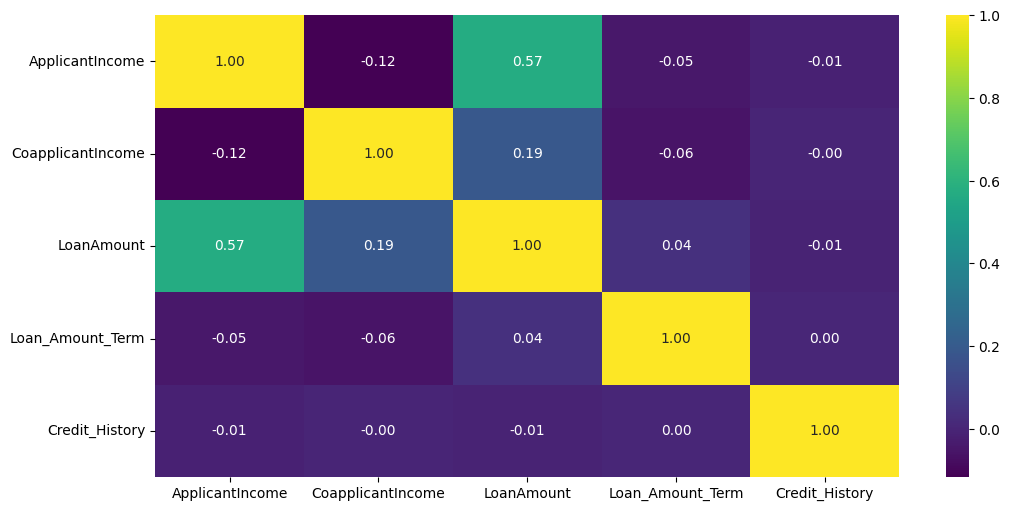

In [12]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [ ]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})


In [13]:
plt.figure(figsize = (12,6))
train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')


KeyError: 'Loan_Status'

<Figure size 1200x600 with 0 Axes>

ValueError: could not convert string to float: 'Male'

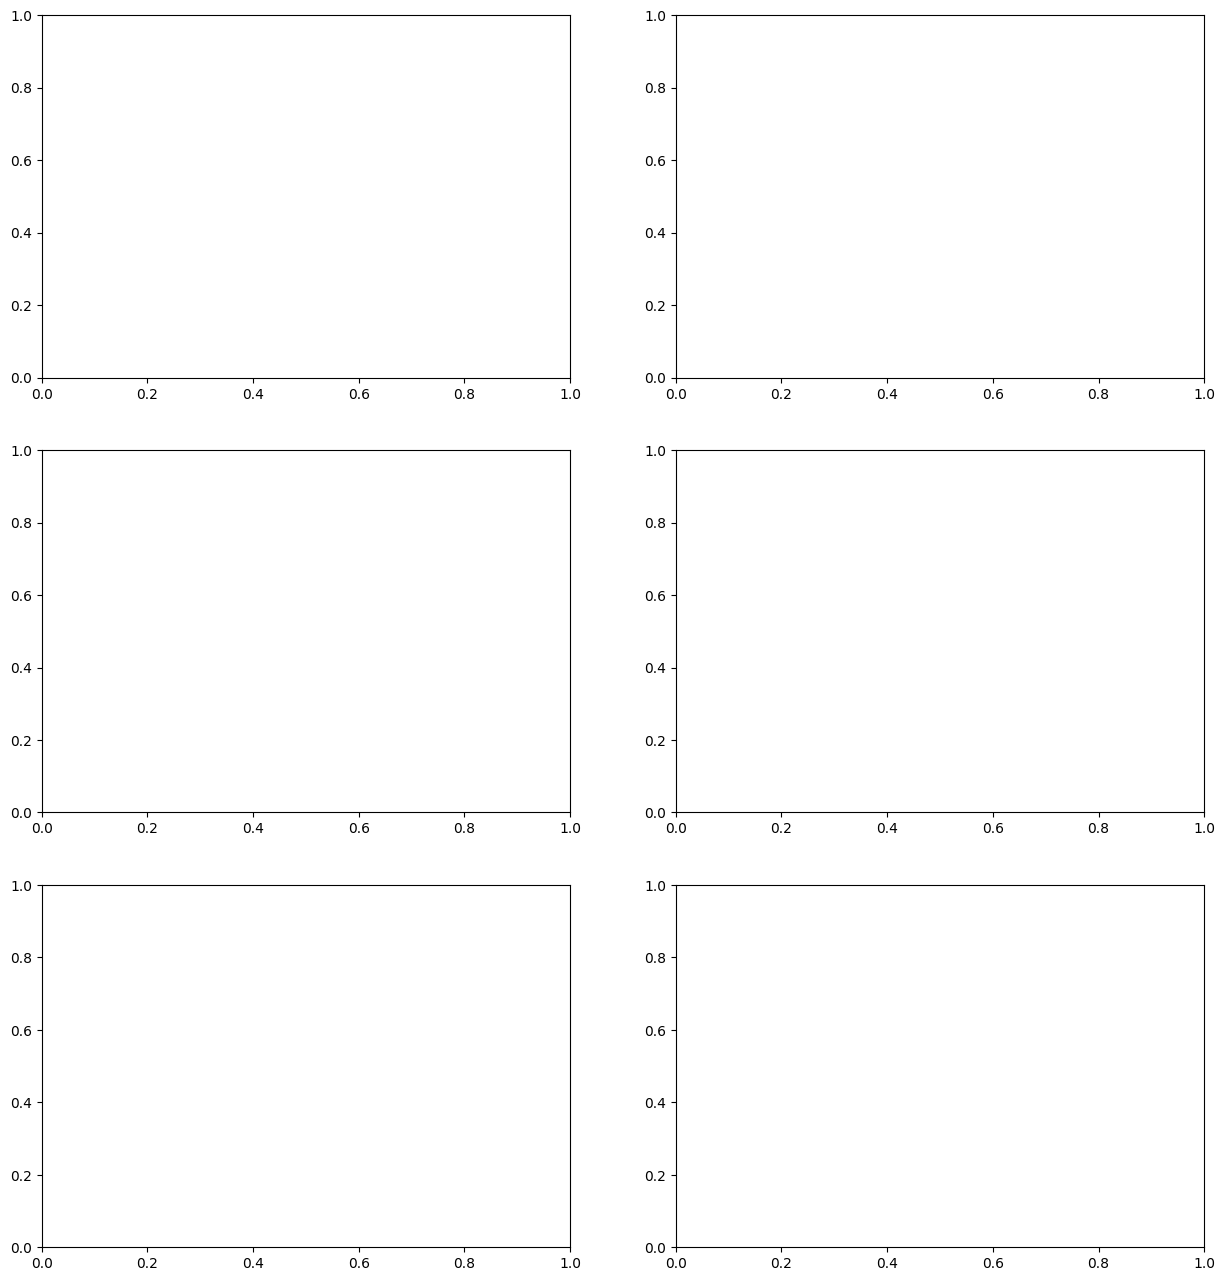

In [14]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(train['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(train['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(train['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(train['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(train['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(train['Property_Area'], ax=ax[2,1], palette='Set2')

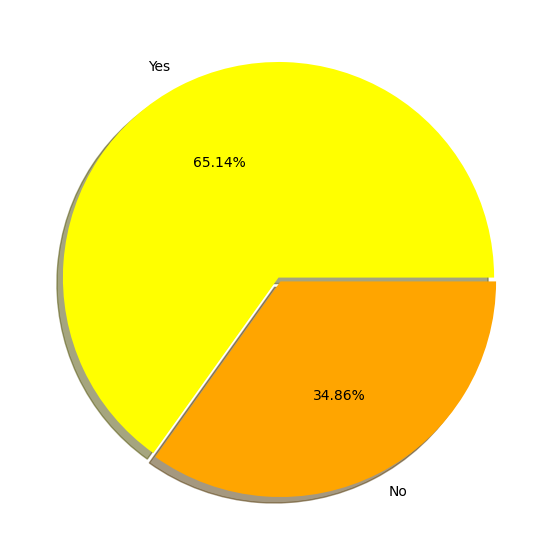

In [16]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [19]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


In [20]:
Education = train[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education


,LoanAmount
Education,
Graduate,154.060215
Not Graduate,118.409449


In [21]:
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

In [23]:
train['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
train['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [25]:
train['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
train['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [27]:
train['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])


In [29]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [30]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')


In [31]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [32]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')


In [33]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [34]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})


In [35]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

In [36]:
scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))


In [37]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [38]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))


In [39]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'SGDClassifier' : {
        'model' : SGDClassifier(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'max_iter': [1000, 1100, 1500, 2100, 2800, 3000],
            'learning_rate' : ['optimal']
        }
    }
}

In [48]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 3/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 5/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 6/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 7/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 8/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 9/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 10/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 4/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 2/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 3/10] END C=

/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.884 total time=   2.1s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END max_depth=15, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.860 total time=   7.6s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.791 total time=   2.8s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.814 total time=   3.3s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END max_depth=15, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.786 total time=   7.5s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END max_depth=15, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.791 total time=   8.6s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.814 total time=   4.0s
[CV 5/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.860 total time=   3.6s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.744 total time=   3.6s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.767 total time=   3.2s
[CV 1/10] END max_depth=11, max_features=log2, min_samples_split=4, n_estimators=300;, score=0.884 total time=   1.0s
[CV 8/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.884 total time=   2.7s
[CV 2/10] END max_depth=11, max_features=log2, min_samples_split=4, n_estimators=300;, score=0.791 total time=   1.0s
[CV 9/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.791 total time=   2.8s
[CV 3/10] END max_depth=11, max_features=log2, min_samples_split=4, n_estimators=300;, score=0.814 total time=   1.0s
[CV 10/10] END max_depth=11, max_features=auto, min_samples_split=6, n_estimators=700;, score=0.786 total time=   3.2s
[CV 4/10] END max_depth=11, max_features=log2, min_samples_split=4, n_estimators=300;, score=0.814 total time=   1.0s
[CV 6/10] END max_depth=11, max_features=log2, min_samp

/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END max_depth=9, max_features=log2, min_samples_split=4, n_estimators=500;, score=0.884 total time=   2.4s
[CV 10/10] END max_depth=9, max_features=log2, min_samples_split=4, n_estimators=500;, score=0.786 total time=   2.3s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END max_depth=9, max_features=log2, min_samples_split=4, n_estimators=500;, score=0.791 total time=   3.1s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.814 total time=   8.0s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.884 total time=  10.8s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.814 total time=   9.8s
[CV 2/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.791 total time=  10.0s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.860 total time=   7.8s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.721 total time=   7.7s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.860 total time=   8.3s
[CV 7/10] END max_depth=13, max_features=auto, min_samples_split=4, n_estimators=2100;, score=0.767 total time=   9.2s
[CV 1/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.884 total time=   1.8s
[CV 2/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.791 total time=   1.7s
[CV 3/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.814 total time=   1.7s
[CV 4/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.814 total time=   1.3s
[CV 6/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.744 total time=   0.9s
[CV 5/10] END max_depth=9, max_features=log2, min_samples_split=6, n_estimators=300;, score=0.860 total time=   1.3s
[CV 7/10] END max_depth=9, max_features=log2, min_samples_sp

/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END max_depth=3, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.767 total time=   8.0s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.884 total time=   3.6s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END max_depth=3, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.791 total time=   6.8s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.791 total time=   3.8s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END max_depth=3, max_features=log2, min_samples_split=4, n_estimators=2100;, score=0.810 total time=   7.9s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.837 total time=   3.4s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.814 total time=   3.1s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.860 total time=   3.4s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.767 total time=   3.6s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.767 total time=   4.0s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.884 total time=   3.2s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.791 total time=   3.4s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.791 total time=   2.4s
[CV 1/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.884 total time=   2.7s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END max_depth=3, max_features=auto, min_samples_split=8, n_estimators=1000;, score=0.810 total time=   3.4s
[CV 3/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.814 total time=   2.7s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.860 total time=   2.6s
[CV 4/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.814 total time=   2.9s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.744 total time=   2.4s


/home/athira/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.767 total time=   3.2s
[CV 9/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.791 total time=   2.4s
[CV 10/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.786 total time=   2.3s
[CV 8/10] END max_depth=13, max_features=auto, min_samples_split=8, n_estimators=700;, score=0.860 total time=   2.7s
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END learning_rate=optimal, max_iter=3000, penalty=l1;, score=0.884 total time=   0.0s
[CV 2/10] END learning_rate=optimal, max_iter=3000, penalty=l1;, score=0.767 total time=   0.0s[CV 3/10] END learning_rate=optimal, max_iter=3000, penalty=l1;, score=0.837 total time=   0.0s

[CV 6/10] END learning_rate=optimal, max_iter=3000, penalty=l1;, score=0.721 total time=   0.0s
[CV 5/10] END learning_rate=optimal, max_iter=3000, penalty=l1;, score=0.581 tot

In [49]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.3, max_iter=1500, penal..."
1,SVC,0.820487,SVC(kernel='linear')
3,RandomForestClassifier,0.820487,"(DecisionTreeClassifier(max_depth=3, max_featu..."
2,AdaBoostClassifier,0.794906,"(DecisionTreeClassifier(max_depth=1, random_st..."
4,SGDClassifier,0.780952,SGDClassifier(max_iter=2100)


In [52]:
final['estimator'].iloc[0]


LogisticRegression(C=0.3, max_iter=1500, penalty='l1', solver='liblinear')

In [53]:
classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [54]:
pred = classifier.predict(X_test)


In [55]:
test_df = pd.read_csv('/home/athira/Desktop/dsa/virtual/test_lAUu6dG.csv')
submission = pd.read_csv('/home/athira/Desktop/dsa/virtual/sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [56]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission.csv', index=False)

In [57]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})


In [58]:
submission.to_csv('sample_submission.csv', index=False)
